In [1]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [0]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator



In [0]:
# Ekstrak dataset ke direcory /tmp
import zipfile, os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/rockpaperscissors/' # Membuat base direktori dataset

In [0]:
# Augmentasi gambar
datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=20,
      horizontal_flip=True,
      validation_split=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      width_shift_range=0.2,
      height_shift_range=0.2,
      fill_mode='nearest')


In [5]:
# Split dataset
train_generator = datagen.flow_from_directory(
	base_dir,
	subset='training',
	target_size=(150,150),
  batch_size=20,
	class_mode='categorical'
)

validation_generator = datagen.flow_from_directory(
	base_dir,
	subset='validation',
	target_size=(150,150),
  batch_size=20,
	class_mode='categorical'
)

Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


In [0]:
# Membuat model CNN
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])



In [0]:
#Membuat function loss dan optimizer
model.compile(loss = 'categorical_crossentropy',
              optimizer=tf.optimizers.RMSprop(lr=0.001), 
              metrics=['accuracy'])

In [13]:
# Melatih Model
history = model.fit(
      train_generator,
      steps_per_epoch=25,
      epochs=25,
      validation_data=validation_generator,
      validation_steps=5,
      verbose=1)

Epoch 1/25
25/25 [==============================] - 34s 1s/step - loss: 1.0157 - accuracy: 0.4277 - val_loss: 1.0208 - val_accuracy: 0.4100
Epoch 2/25
25/25 [==============================] - 34s 1s/step - loss: 0.9678 - accuracy: 0.5540 - val_loss: 0.8865 - val_accuracy: 0.6100
Epoch 3/25
25/25 [==============================] - 34s 1s/step - loss: 0.8465 - accuracy: 0.5840 - val_loss: 0.9384 - val_accuracy: 0.4800
Epoch 4/25
25/25 [==============================] - 34s 1s/step - loss: 0.8741 - accuracy: 0.6020 - val_loss: 0.6783 - val_accuracy: 0.6900
Epoch 5/25
25/25 [==============================] - 34s 1s/step - loss: 0.6700 - accuracy: 0.6945 - val_loss: 0.7443 - val_accuracy: 0.6800
Epoch 6/25
25/25 [==============================] - 34s 1s/step - loss: 0.6764 - accuracy: 0.7140 - val_loss: 0.5186 - val_accuracy: 0.8200
Epoch 7/25
25/25 [==============================] - 34s 1s/step - loss: 0.5879 - accuracy: 0.7440 - val_loss: 0.5069 - val_accuracy: 0.8000
Epoch 8/25
25/25 [==

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])



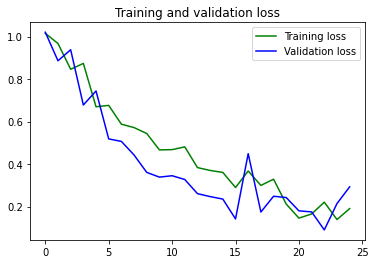

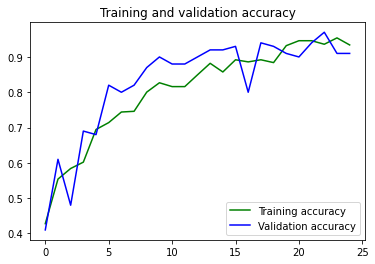

<Figure size 432x288 with 0 Axes>

In [14]:
# Menampilkan visualisasi dari hasil model yang sudah dilatih
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# list semua data dalam history
print(history.history.keys())
print()

# menghitung loss pada training dan validation
epochs = range(len(loss))

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc='upper right')
plt.figure()

#Menghitung accuracy pada training dan validation
epochs = range(len(acc))

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.figure()

plt.show()

Using TensorFlow backend.


Saving 1MMkSW3f1CAsw03q.png to 1MMkSW3f1CAsw03q.png
1MMkSW3f1CAsw03q.png
2
scissors


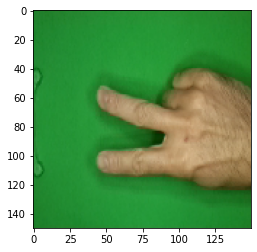

In [16]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  classes = list(classes[0]).index(1)
  print(classes)
  if classes==0:
    print('paper')
  elif classes==1:
    print('rock')
  else:
    print('scissors')
